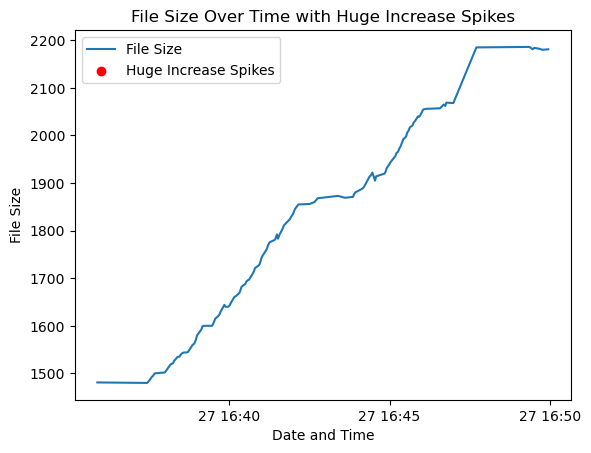

Rows with Huge Increase in File Size within 60 seconds:
Empty DataFrame
Columns: [DateTime, File size, TimeDiff]
Index: []


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data from the specified path into a DataFrame
file_path = '../data/file-size-over-time.csv'
df = pd.read_csv(file_path)

# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')  # Correct format

# Calculate time differences between consecutive rows
df['TimeDiff'] = df['DateTime'].diff().dt.total_seconds()

# Set thresholds for spike detection
threshold_seconds = 60  # for example, consider spikes within 1 minute
huge_increase_threshold = 30  # for example, consider a huge increase in file size as 50 or more

# Find rows with a ahuge increase in file size within the specified time threshold
huge_increase_spikes = df[(df['TimeDiff'] < threshold_seconds) & (df['File size'].diff() >= huge_increase_threshold*df['TimeDiff'])]

# Plot the data with spikes marked
plt.plot(df['DateTime'], df['File size'], label='File Size')
plt.scatter(huge_increase_spikes['DateTime'], huge_increase_spikes['File size'], color='red', label='Huge Increase Spikes')
plt.xlabel('Date and Time')
plt.ylabel('File Size')
plt.title('File Size Over Time with Huge Increase Spikes')
plt.legend()
plt.show()

# Display the rows with huge increase spikes
print("Rows with Huge Increase in File Size within", threshold_seconds, "seconds:")
print(huge_increase_spikes)


               DateTime  File size  TimeDiff  SizeDiff
156 2023-03-13 18:50:02       2102       3.0    -101.0
157 2023-03-13 18:50:04       2203       2.0     101.0
159 2023-03-13 18:50:11       2325       3.0     121.0
176 2023-03-13 18:53:53       1484       6.0    -615.0
178 2023-03-13 18:53:59       1969       3.0     486.0
222.0
1101.0


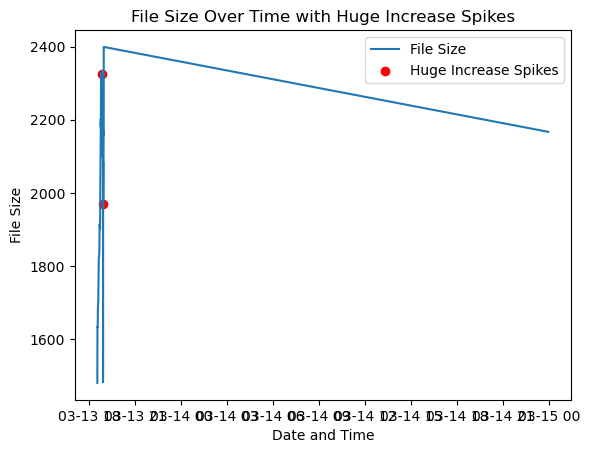

Rows with Huge Increase in File Size within 60 seconds:
               DateTime  File size  TimeDiff  SizeDiff
159 2023-03-13 18:50:11       2325       3.0     121.0
178 2023-03-13 18:53:59       1969       3.0     486.0


In [13]:
file_path_p = '../data/file-size-over-time(p).csv'
df_p = pd.read_csv(file_path_p)

# Convert 'DateTime' column to datetime format
df_p['DateTime'] = pd.to_datetime(df_p['DateTime'], format='%Y-%m-%d %H:%M:%S')  # Correct format

# Calculate time differences between consecutive rows
df_p['TimeDiff'] = df_p['DateTime'].diff().dt.total_seconds()

df_p['SizeDiff'] = df_p['File size'].diff()

previous_delete = 0
# List to store spikes
filtered_spikes = []
# Find rows with a huge increase in file size within the specified time threshold
huge_increase_spikes_p = df_p[(df_p['TimeDiff'] < threshold_seconds) & (abs(df_p['File size'].diff()) >= huge_increase_threshold*df_p['TimeDiff'])]
print(huge_increase_spikes_p)
for index, spike_row in huge_increase_spikes_p.iterrows():
    # Identify the corresponding row in the original DataFrame
    original_row = df_p.loc[index]
    if original_row['SizeDiff'] <= 0:
        # Add the spike to the filtered list
        previous_delete = original_row['SizeDiff']
    # Check if the item is a file size increase and not a decrease
    if original_row['SizeDiff'] >= 0:
        # Add the spike to the filtered list
        if (abs(original_row['SizeDiff']+previous_delete)>=5):
            print(abs(original_row['SizeDiff']-previous_delete))
            filtered_spikes.append(spike_row)
huge_increase_spikes_p = pd.DataFrame(filtered_spikes)
# Plot the data with spikes marked
plt.plot(df_p['DateTime'], df_p['File size'], label='File Size')
plt.scatter(huge_increase_spikes_p['DateTime'], huge_increase_spikes_p['File size'], color='red', label='Huge Increase Spikes')
plt.xlabel('Date and Time')
plt.ylabel('File Size')
plt.title('File Size Over Time with Huge Increase Spikes')
plt.legend()
plt.show()

# Display the rows with huge increase spikes
print("Rows with Huge Increase in File Size within", threshold_seconds, "seconds:")
print(huge_increase_spikes_p)
